<a href="https://colab.research.google.com/github/BharatiChaudhury/Fractional-Cover-of-Green-canopy-soil-and-shadow-/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below code Gives Fractional Canopy Cover of Green Canopy, soil and shadow of a crop field image. Some part of the code is the implementation of https://link.springer.com/article/10.1007/s11119-017-9511-z

In [ ]:
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import cv2
from skimage import data
from skimage.filters import threshold_multiotsu
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving 04.jpg to 04 (2).jpg


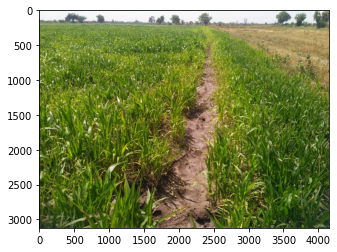

In [ ]:
img_='04.jpg'
img = PIL.Image.open(img_)
plt.imshow(img)
plt.show()

In [ ]:
## Convert pixels to float of pixels 
pix=asarray(img)
print(pix.dtype)
pix.shape
pix=pix.astype(float)
pix.max()
#print(pix)

uint8


255.0

In [ ]:
#RGB Image to CIELAB Transformation
i=cv2.imread(img_)
i_cie=cv2.cvtColor(i,cv2.COLOR_BGR2LAB)
print(i_cie.shape)
X=i_cie[:,:,0]
Y=i_cie[:,:,1]
Z=i_cie[:,:,2]
x=np.zeros((len(X),len(X[0])),dtype=float)
y=np.zeros((len(Y),len(Y[0])),dtype=float)
z=np.zeros((len(Z),len(Z[0])),dtype=float)
cg=np.zeros((len(Z),len(Z[0])),dtype=float)
for j in range(len(X[0])):
  for i in range(len(X)):
    s=X[i,j]+Y[i,j]+Z[i,j]
    if int (s)!=0:
      x[i,j]=X[i,j]/s
      y[i,j]=Y[i,j]/s
      z[i,j]=Z[i,j]/s
    else:
      x[i,j]=X[i,j]
      y[i,j]=Y[i,j]
      z[i,j]=Z[i,j]

(3120, 4160, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [ ]:
##Contrasted Ground Shadow
cg=np.zeros((len(Z),len(Z[0])),dtype=float)
for j in range(len(Z[0])):
  for i in range(len(Z)):
    if (z[i,j])!=0:
      cg[i,j]=x[i,j]*y[i,j]/z[i,j]
    else:
      cg[i,j]=x[i,j]*y[i,j]


In [ ]:
#Multi Otsu Threshold Caluculation, First Threshold is of Shadow
thresholds = threshold_multiotsu(cg)
t1,t2=thresholds[0],thresholds[1]

In [ ]:
## Convert pixels to float of pixels 
pix=asarray(img)
print(pix.dtype)
pix.shape
pix=pix.astype(float)
pix.max()
#print(pix)

uint8


255.0

In [ ]:
## Mask shadow region and calculate Shadow Ratio
Shadow_=pix
S_=0
for j in range(len(Z[0])):
  for i in range(len(Z)):
    if t1<=cg[i,j]:
      Shadow_[i,j][0],Shadow_[i,j][1],Shadow_[i,j][2]=255.0,255.0,255.0
      S_+=1
    else:
      Shadow_[i,j][0],Shadow_[i,j][1],Shadow_[i,j][2]=0,0,0

In [ ]:
## Convert pixels to float of pixels 
pix=asarray(img)
print(pix.dtype)
pix.shape
pix=pix.astype(float)

uint8


In [ ]:
# Shadow Removal
# 1) Excess Green Index Calulation 
# 2) Removal of Shadow from Exg
R=pix[:,:,0]
G=pix[:,:,1]
B=pix[:,:,2]
print(pix[:,:,0].shape)
np.max(R)
Rmax,Gmax,Bmax=np.max(R),np.max(G),np.max(B)
print(Rmax,Gmax,Bmax)
R=R/Rmax
G=G/Gmax
B=B/Bmax
Exg=np.zeros((len(R),len(R[0])),dtype=float)
for j in range(len(R[0])):
  for i in range(len(R)):
    s=R[i,j]+G[i,j]+B[i,j]
    r=R[i,j]/s
    g=G[i,j]/s
    b=B[i,j]/s
    Exg[i,j]=(2*g)-r-b 

(3120, 4160)
255.0 255.0 255.0


In [ ]:
#Exg + Otsu
pix=asarray(img)
pix=pix.astype(float)
i=cv2.imread(img_,0)
ret,th = cv2.threshold(i,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
t=ret/255.0
for j in range(len(R[0])):
  for i in range(len(R)):
    if Exg[i,j]>=t:
     Exg[i,j]=255.0
    else:
      Exg[i,j]=0

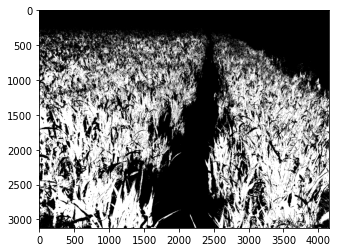

In [ ]:
plt.imshow(Exg,cmap='gray')

In [ ]:
#Ground shadow removal by subtraction
F=np.zeros((len(Z),len(Z[0])),dtype=float)
for j in range(len(Z[0])):
  for i in range(len(Z)):
    F[i,j]=Exg[i,j]-cg[i,j]

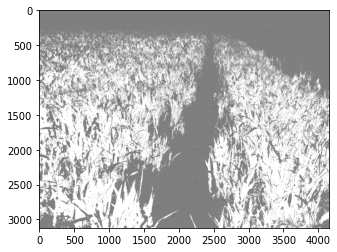

In [ ]:
## Contrasted Shadow Removed Image
plt.imshow(F,cmap='gray')

In [ ]:
## Final Image
G_=0
for j in range(len(Z[0])):
  for i in range(len(Z)):
    if F[i,j]>=0:
      pix[i,j][0],pix[i,j][1],pix[i,j][2]=255.0,255.0,255.0
      G_+=1
    else:
      pix[i,j][0],pix[i,j][1],pix[i,j][2]=0,0,0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


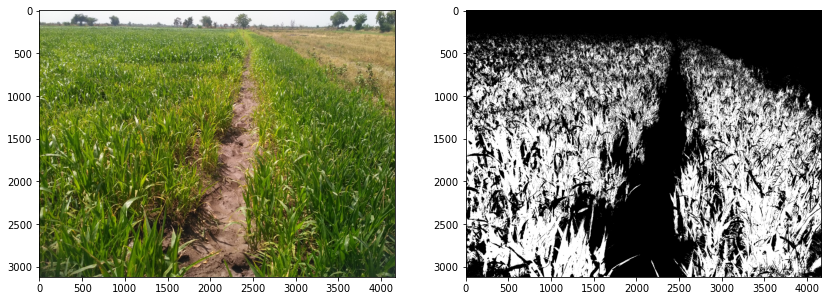

In [ ]:
##Final Shadow Removed Image 
fig=plt.figure(figsize=(14,14))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1,2,2)
plt.imshow(pix,cmap='gray')
plt.show()

In [ ]:
#Percentage of Soil
s=threshold_multiotsu(i_cie)
pix=asarray(img)
pix=pix.astype(float)
soil=pix
soil_=0
for j in range(len(Z[0])):
  for i in range(len(Z)):
    if i_cie[i,j][0] and i_cie[i,j][1] and i_cie[i,j][2] <= s[1]:
      soil[i,j][0],soil[i,j][1],soil[i,j][2]=255.0,255.0,255.0
      soil_+=1
    else:
      soil[i,j][0],soil[i,j][1],soil[i,j][2]=0,0,0

In [ ]:
pixtotal=len(pix)*len(pix[0])
green_=G_/pixtotal
print("Green_Canopy_Percentage:",green_*100)
Shadow_=S_/pixtotal
print("Shadow_percentage:", Shadow_*100)
s=soil_/pixtotal
print("Soil_percentage:", s*100)
bg=100-

Green_Canopy_Percentage: 41.356162167159766
Shadow_percentage: 0.27346831854043396
Soil_percentage: 11.28870808678501
